## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouseId_grouped_df = merge_df.set_index('Mouse ID').groupby(['Mouse ID'])
mice_count = len(mouseId_grouped_df)
print(f"The number of mice is {mice_count}.")

The number of mice is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id_df = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id_all_data_df = merge_df.loc[merge_df['Mouse ID'] == "g989"]
dup_mouse_id_all_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df.loc[merge_df['Mouse ID'] != "g989"]
clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouseId_grouped_df = clean_merge_df.set_index('Mouse ID').groupby(['Mouse ID'])
mice_count = len(mouseId_grouped_df)
print(f"The number of mice is {mice_count}.")

The number of mice is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_grouped_df = clean_merge_df.set_index('Drug Regimen').groupby(['Drug Regimen'])

tumor_mean = drug_regimen_grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen_grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = drug_regimen_grouped_df['Tumor Volume (mm3)'].var()
tumor_standard_deviation = drug_regimen_grouped_df['Tumor Volume (mm3)'].std()
tumer_SEM = drug_regimen_grouped_df['Tumor Volume (mm3)'].sem()

summary_stat_df = pd.DataFrame({"Mean": tumor_mean,
                                "Median":tumor_median,
                                "Variance":tumor_variance,
                                "Standard Deviation": tumor_standard_deviation,
                                "SEM": tumer_SEM
                               })
summary_stat_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_regimen_grouped_df = clean_merge_df.set_index('Drug Regimen').groupby(['Drug Regimen'])

drug_regimen_agg_df = drug_regimen_grouped_df.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', st.sem]})
drug_regimen_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

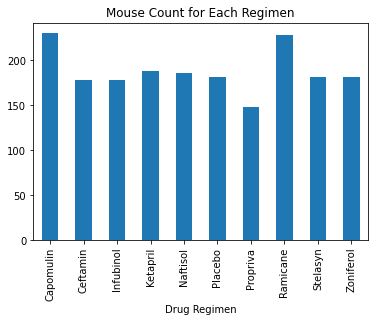

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment_df = drug_regimen_grouped_df['Mouse ID'].count()

mice_per_treatment_df.plot(kind='bar', title="Mouse Count for Each Regimen")

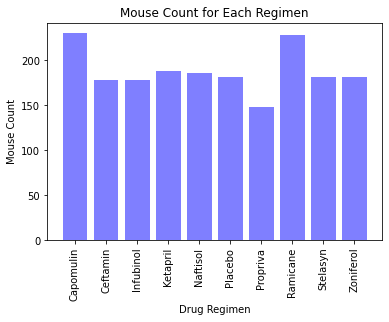

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = drug_regimen_grouped_df.groups.keys()
y_axis = drug_regimen_grouped_df['Mouse ID'].count()

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation='vertical')
plt.title("Mouse Count for Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()

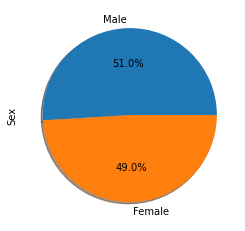

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex_df = clean_merge_df['Sex'].value_counts()
mice_sex_df.plot(kind="pie", shadow=True, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x213ecaf29b0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

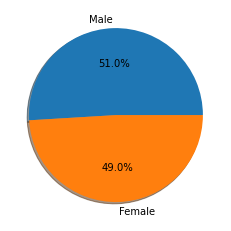

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
mice_counts_by_sex = clean_merge_df['Sex'].value_counts()

plt.pie(mice_counts_by_sex, labels=labels, autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_df = clean_merge_df.loc[clean_merge_df['Drug Regimen'].isin(regimens_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = treatment_df.groupby(treatment_df['Mouse ID']).agg({'Timepoint':['max']}) 

last_timepoint_df.columns = ['Timepoint']
last_timepoint_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = last_timepoint_df.reset_index()
last_timepoint_df

last_timepoint_merge_df = pd.merge(last_timepoint_df, clean_merge_df, how="left", on =['Mouse ID', 'Timepoint'])
last_timepoint_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_by_regimen = last_timepoint_merge_df['Tumor Volume (mm3)'].loc[last_timepoint_merge_df['Drug Regimen'] == regimen]  
    
    # add subset 
    tumor_volume.append(tumor_volume_by_regimen)     
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_by_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    
    print(f'{regimen}: Interquartile Range (IQR) is {round(iqr,4)}.')
    print(f'{regimen}: Values below {round(lower_bound,4)} or above {round(upper_bound,4)} could be outliers.\n')

Capomulin: Interquartile Range (IQR) is 7.7819.
Capomulin: Values below 20.7046 or above 51.832 could be outliers.

Ramicane: Interquartile Range (IQR) is 9.0985.
Ramicane: Values below 17.9127 or above 54.3068 could be outliers.

Infubinol: Interquartile Range (IQR) is 11.4771.
Infubinol: Values below 36.8329 or above 82.7414 could be outliers.

Ceftamin: Interquartile Range (IQR) is 15.5778.
Ceftamin: Values below 25.3554 or above 87.6665 could be outliers.



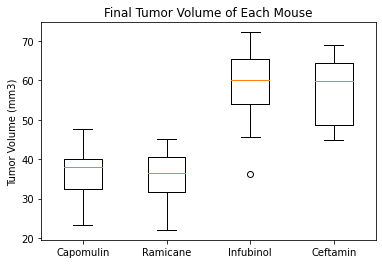

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volume of Each Mouse')
ax.set_xticklabels(regimens_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

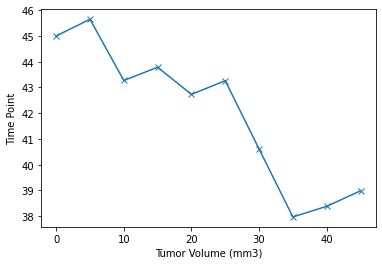

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# pick an example
# mice_Capomulin_df = clean_merge_df.loc[clean_merge_df['Drug Regimen']=="Capomulin"]
# mice_Capomulin_df.sample()

mice_Capomulin_df = clean_merge_df.loc[clean_merge_df['Mouse ID']=="b128"]

plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time Point")
plt.plot(mice_Capomulin_df['Timepoint'], mice_Capomulin_df['Tumor Volume (mm3)'], marker='x')
plt.show()

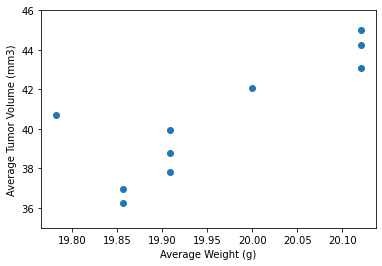

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mice_Capomulin_df = clean_merge_df.loc[clean_merge_df['Drug Regimen']=="Capomulin"].groupby(clean_merge_df['Timepoint']).agg({'Tumor Volume (mm3)': ['mean'],
                                                                                                                             'Weight (g)': ['mean']})
mice_Capomulin_df.columns = ['Average Tumor Volume (mm3)', 'Average Weight (g)'] 

avg_weight = mice_Capomulin_df['Average Weight (g)']
avg_tumor_volume =  mice_Capomulin_df['Average Tumor Volume (mm3)']

plt.scatter(avg_weight, avg_tumor_volume, marker="o")
plt.ylim(35,46)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.82


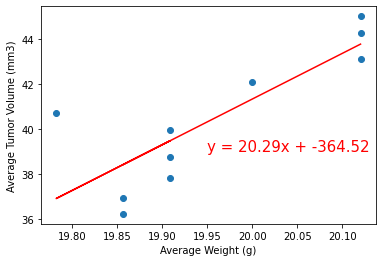

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_weight, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


from scipy.stats import linregress
x_values = avg_weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (19.95,39),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
